# Del 8: Uvod v strojno učenje - Nadaljevanje

In [1]:
import pandas as pd
import numpy as np

## Instance Based Learning Vs. Model Based Learning




<p><img alt="KNN Complexity" src="images/knn_complexity.svg"></p>

<p><img alt="Model Based Learning" src="images/regression_complexity.png"></p>


## Linear Regression

### Introduction To The Data


<p>Here are some of the columns:</p>
<ul>
<li><code>Lot Area</code>: Lot size in square feet.</li>
<li><code>Overall Qual</code>: Rates the overall material and finish of the house.</li>
<li><code>Overall Cond</code>: Rates the overall condition of the house.</li>
<li><code>Year Built</code>: Original construction date.</li>
<li><code>Low Qual Fin SF</code>: Low quality finished square feet (all floors).</li>
<li><code>Full Bath</code>: Full bathrooms above grade.</li>
<li><code>Fireplaces</code>: Number of fireplaces.</li>
</ul>


In [2]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

### Simple Linear Regression


<p><img alt="Simple Linear Regression" src="images/simple_linear_regression.svg"></p>


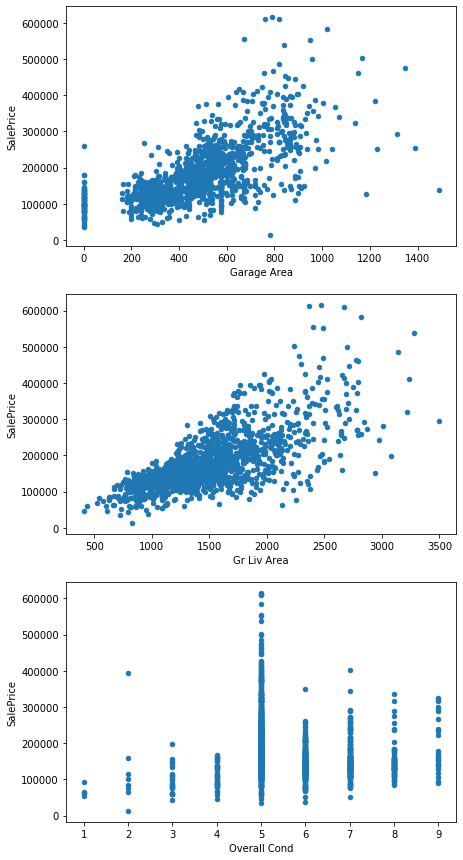

In [4]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

### Using Scikit-Learn To Train And Predict

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[['Gr Liv Area']],train[['SalePrice']])

print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[[116.86624683]]
[5366.82171006]


In [14]:
import numpy as np

lr=LinearRegression()
lr.fit(train[['Gr Liv Area']],train[['SalePrice']])
from sklearn.metrics import mean_squared_error
train_predictions=lr.predict(train[['Gr Liv Area']])
test_predictions=lr.predict(test[['Gr Liv Area']])

In [15]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

In [16]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


### Multiple Linear Regression

In [18]:
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols],train[['SalePrice']])
from sklearn.metrics import mean_squared_error
train_predictions_2=lr.predict(train[cols])
test_predictions_2=lr.predict(test[cols])



In [19]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

In [20]:
print(train_rmse_2)
print(test_rmse_2)

56034.3620014128
57088.25161263909


### Missing Values

In [21]:
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [22]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
print(null_series)

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64


In [23]:
full_cols_series=null_series[null_series==0]

### Correlating Feature Columns With Target Column

In [24]:
len(full_cols_series)

25

In [25]:
train_subset=train[full_cols_series.index]

In [26]:
cormat=train_subset.corr()
cormat

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,...,-0.058123,-0.051493,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,...,-0.046967,-0.110141,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,...,0.166939,0.179216,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730
Overall Qual,-0.049116,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,...,0.609088,0.581106,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562
Overall Cond,0.078547,-0.099862,-0.010353,-0.083581,1.000000,-0.154903,-0.009733,-0.015807,-0.133710,-0.223043,...,-0.156004,-0.132401,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,-0.099395
1st Flr SF,-0.060288,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,...,0.441351,0.477281,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119
2nd Flr SF,0.011011,0.342229,0.005407,0.200105,-0.009733,-0.311660,1.000000,-0.017831,0.647971,0.396149,...,0.169252,0.100471,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.202352
Low Qual Fin SF,0.016425,-0.001077,-0.013667,-0.070362,-0.015807,-0.011781,-0.017831,1.000000,0.075539,-0.013896,...,-0.047518,-0.049463,-0.029479,-0.014001,0.144095,-0.000762,-0.026807,-0.002486,-0.007269,-0.060352
Gr Liv Area,-0.036472,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,...,0.498711,0.465366,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990
Full Bath,-0.074932,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,...,0.468295,0.402743,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194


In [29]:
sorted_corrs=cormat['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

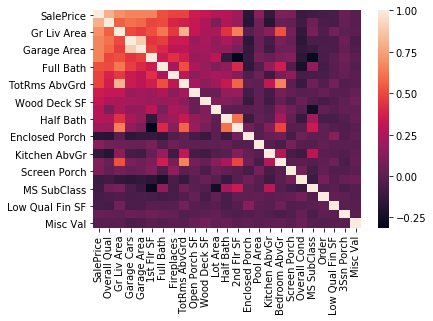

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
strong_corrs=sorted_corrs[sorted_corrs>0.3]
cormat=train_subset[sorted_corrs.index].corr()
sns.heatmap(cormat)
plt.show()


### Train And Test Model

In [32]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
SalePrice        1470 non-null int64
Overall Qual     1470 non-null int64
Gr Liv Area      1470 non-null int64
Garage Area      1469 non-null float64
1st Flr SF       1470 non-null int64
Full Bath        1470 non-null int64
Fireplaces       1470 non-null int64
Open Porch SF    1470 non-null int64
Wood Deck SF     1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [33]:
features=final_corr_cols.drop(['SalePrice']).index
clean_test=test[final_corr_cols.index].dropna()
target='SalePrice'

In [34]:
lr = LinearRegression()
lr.fit(train[features],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [36]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [37]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41032.026120197406


### Removing Low Variance Features

In [38]:
unit_train=(train[features]-train[features].min())/(train[features].max()-train[features].min())

In [39]:
print(unit_train.min())
print(unit_train.max())

Overall Qual     0.0
Gr Liv Area      0.0
Garage Area      0.0
1st Flr SF       0.0
Full Bath        0.0
Fireplaces       0.0
Open Porch SF    0.0
Wood Deck SF     0.0
dtype: float64
Overall Qual     1.0
Gr Liv Area      1.0
Garage Area      1.0
1st Flr SF       1.0
Full Bath        1.0
Fireplaces       1.0
Open Porch SF    1.0
Wood Deck SF     1.0
dtype: float64


In [40]:
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


### Final Model

In [41]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [42]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [44]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [45]:
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

In [46]:
print(train_rmse_2)
print(test_rmse_2)

34372.69670778396
40591.42702437728


## Exercise: Predicting House Sale Prices


### Introduction

<img src="images/pipeline.svg">

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [48]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [49]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [50]:
len(df)

2930

In [51]:
def transform_features(df):
    return df

In [52]:
# ni manjčajočih vrednosti
df['Gr Liv Area'].isnull().sum()

0

In [53]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [54]:
def train_and_test(df, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions=lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [57]:
transform_df=transform_features(df)
filtered_df=select_features(transform_df)

rmse=train_and_test(filtered_df,debug=True)
rmse

Selected features: ['Gr Liv Area']


57088.25161263909

### Feature Engineering

[Dataset metadata](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

#### Missing Values

1: All columns: Drop any with 5% or more missing values for now.

In [58]:
num_missing = df.isnull().sum()

In [70]:
# Filter Series to columns containing >5% missing values
drop_missing_cols=num_missing[(num_missing>len(df)/20)].sort_values()

In [71]:
# Drop those columns from the data frame. Note the use of the .index accessor
drop_missing_cols.index

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

2: Text columns: Drop any with 1 or more missing values for now.

In [72]:
## Series object: column name -> number of missing values
df=df.drop(drop_missing_cols.index,axis=1)

In [77]:
## Filter Series to columns containing *any* missing values
text_mv_counts=df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

In [78]:
drop_missing_cols_2=text_mv_counts[text_mv_counts>0]

In [79]:
df=df.drop(drop_missing_cols_2.index,axis=1)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [81]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [83]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict=df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [85]:
## Use `pd.DataFrame.fillna()` to replace missing values.
df=df.fillna(replacement_values_dict)

In [86]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

#### Transforming Improper Numerical Features

In [87]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [88]:
df[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [89]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [90]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [91]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:
- that aren't useful for ML
- leak data about the final sale, read more about columns here

In [92]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [93]:
df.dtypes.value_counts()

object     41
int64      24
float64    11
dtype: int64

In [94]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [97]:
def transform_features(df, debug=False):
    # naredimo kopijo dfja
    df_working = df.copy()
    
    # odstranimo vse stolpce ki vsebujejo več kot 5% manjkajočih vrednosti
    num_missing=df_working.isnull().sum()
    drop_missing_cols=num_missing[(num_missing>len(df_working)/20)].sort_values()
    
    if debug: print(f'\nDropping columns: {drop_missing_cols.index.tolist()}')
    df_working=df_working.drop(drop_missing_cols.index,axis=1)
    
    # odstranimo vse stolpce ki vsebujejo object in manjkajoče vrednosti
    text_mv_counts=df_working.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2=text_mv_counts[text_mv_counts>0]
    drop_missing_cols_2=df_working.drop(drop_missing_cols_2.index,axis=1)
    if debug: print(f'\nDropping columns (object): {drop_missing_cols_2.index.tolist()}')
    
    
    # ostale manjkajoče vrednosti dopolnemo z najbolj pogosto vrednostjo v stolpcu
    
    if debug: 
        print('\nReplacement values:')
        for key, value in replacement_values_dict.items():
            print(f'\t{key}: {value}')
    
    
    # naredimo nove značilke

    
    # odvržemo še ostale nepotrebne stolpce
    df_working = df_working.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    return df_working   

In [99]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 

57088.25161263909

### Feature Selection

In [100]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,528.0,210,62,0,0,0,0,0,2010,215000
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,730.0,140,0,0,0,120,0,0,2010,105000
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,312.0,393,36,0,0,0,0,12500,2010,172000
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,522.0,0,0,0,0,0,0,0,2010,244000
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,482.0,212,34,0,0,0,0,0,2010,189900


In [ ]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)


In [ ]:
## Drop columns with less than 0.4 correlation with SalePrice


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = 
sns.heatmap(corrmat)
plt.show()

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

def select_features(df_, coeff_threshold=0.4, debug=False):
    df = df_.copy()
    df_org_shape = df.shape

    
    
    
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    return df

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df, coeff_threshold=0.4, debug=True)
rmse = train_and_test(filtered_df, debug=True)

rmse

#### Categorical Features

In [101]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [102]:
df['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [103]:
df['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [104]:
df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [105]:
df['Utilities'] = df['Utilities'].astype('category')

In [106]:
df['Utilities'].head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: category
Categories (3, object): [AllPub, NoSeWa, NoSewr]

In [107]:
df['Utilities'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [108]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)
text_cols = transform_df.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(transform_df[col].unique()))
    
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
transform_df['Utilities'].cat.codes.value_counts()

MS Zoning: 7
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Mas Vnr Type: 6
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Bsmt Qual: 6
Bsmt Cond: 6
Bsmt Exposure: 5
BsmtFin Type 1: 7
BsmtFin Type 2: 7
Heating: 6
Heating QC: 5
Central Air: 2
Electrical: 6
Kitchen Qual: 5
Functional: 8
Paved Drive: 3


0    2927
2       2
1       1
dtype: int64

#### Dummy Coding

In [109]:
pd.get_dummies(df['Utilities']).head()

,AllPub,NoSeWa,NoSewr
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [110]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [111]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [112]:
dummy_cols = pd.DataFrame()
for col in transform_cat_cols:
    dummy_cols=pd.get_dummies(transform_df[col])
    transform_df=pd.concat([transform_df,dummy_cols],axis=1)
    

In [113]:
transform_df.shape

(2930, 222)

In [114]:
transform_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,N,Y
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,1,0,0,0,0,0,1
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,1,0,0,0,0,0,1
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,1,0,0,0,0,0,1
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,1,0,0,0,0,0,1
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,1,0,0,0,0,0,1


In [115]:
transform_df.dtypes.value_counts()

uint8       158
int64        23
float64       9
category      5
category      2
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
dtype: int64

In [116]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [117]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)

In [120]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts>10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [ ]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = 
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [121]:
transform_df.dtypes.value_counts()

object     29
int64      22
float64     9
dtype: int64

Update select_features()

In [122]:
def select_features(df_, coeff_threshold=0.4, uniq_threshold=10, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = 
    drop_nonuniq_cols = 
    df = 
    
    text_cols = df.select_dtypes(include=['object'])

    
    return df

SyntaxError: invalid syntax (<ipython-input-122-c06ae5747dea>, line 19)

In [123]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10,debug=False)
rmse = train_and_test(filtered_df)

rmse

TypeError: select_features() got an unexpected keyword argument 'coeff_threshold'

### Train And Test

In [124]:
def train_and_test(df, k=0, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

- When k equals 0, perform holdout validation (what we already implemented):
    - Select the first 1460 rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.

In [125]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    

- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 1460 rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.

In [127]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse

- When k is greater than 1, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [134]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        if debug: print(rmse_one)
        if debug: print(rmse_two)
        return avg_rmse
    
    else:
        kf=KFold(n_splits=k,shuffle=True)
        rmse_values=[]
        for train_index,test_index in kf.split(df):
            train=df.iloc[train_index]
            test=df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features]) 
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse=np.mean(rmse_values)
        return avg_rmse

### Using the model

In [135]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

56659.15777347221

#### Testing different thresholds

In [139]:
# coeff_threshold
coeff_threshold_params = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
for i in coeff_threshold_params:
    filtered=select_features(transform_df,coeff_threshold=i)
    rmse=train_and_test(filtered_df,k=4)
    rmse_values.append(rmse)

TypeError: select_features() got an unexpected keyword argument 'coeff_threshold'

In [137]:
rmse_values

[]

In [ ]:
plt.scatter(x=coeff_threshold_params, y=rmse_values)
plt.show()

In [140]:
# uniq_threshold
uniq_threshold_params = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)



In [141]:
rmse_values

[]

ValueError: x and y must be the same size

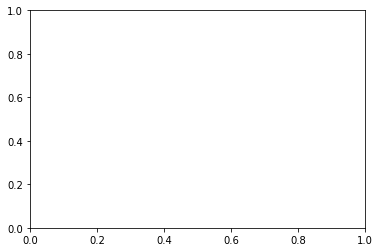

In [142]:
plt.scatter(x=uniq_threshold_params, y=rmse_values)
plt.show()

In [143]:
# optimiziran model
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.1, uniq_threshold=5,debug=False)
rmse = train_and_test(filtered_df, k=4)
rmse

TypeError: select_features() got an unexpected keyword argument 'coeff_threshold'